In [55]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('/content/Housing.csv')
display(df.head())
print(df.columns.tolist())


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [47]:
# Replace furnishingstatus values
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 1,
    'unfurnished': 0,
    'semi-furnished': 0
})

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 55.5+ KB
None


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1


In [48]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [50]:
df.head()
# df.info()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [51]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [52]:
print(df.corr())

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

In [59]:
scaler = StandardScaler()
df[['area', 'price']] =scaler.fit_transform(df[['price','area']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,1
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,1
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,0
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,1
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,1


In [60]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


simple Linear regression

In [64]:
# checking the realtion through heatmap and correlation
corr= df.corr()
print(corr)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

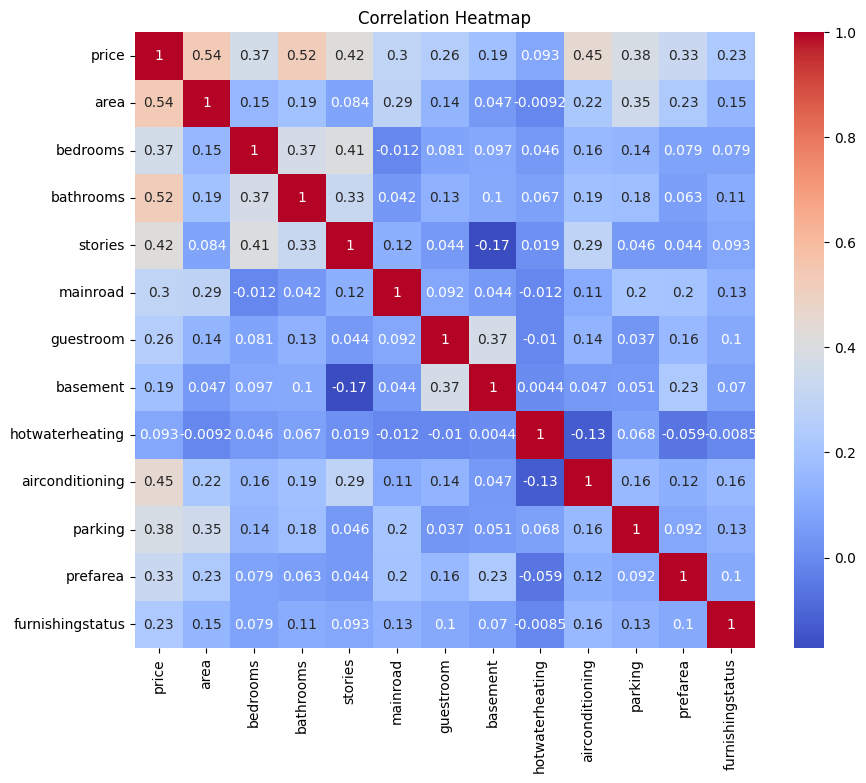

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linecolor='gray')
plt.title('Correlation Heatmap')
plt.show()


In [73]:
# Features and target
X_simple = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [74]:
# Train model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

LinearRegression()

In [75]:
# Predict
y_pred = model_simple.predict(X_test)

In [76]:
# Evaluate
print("Simple Linear Regression:")
print("Intercept:", model_simple.intercept_)
print("Slope:", model_simple.coef_[0])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Simple Linear Regression:
Intercept: -0.03303639036746136
Slope: 0.4939447319034815
MAE: 0.7891743556596559
MSE: 1.052449896825006
R² Score: 0.27287851871974667


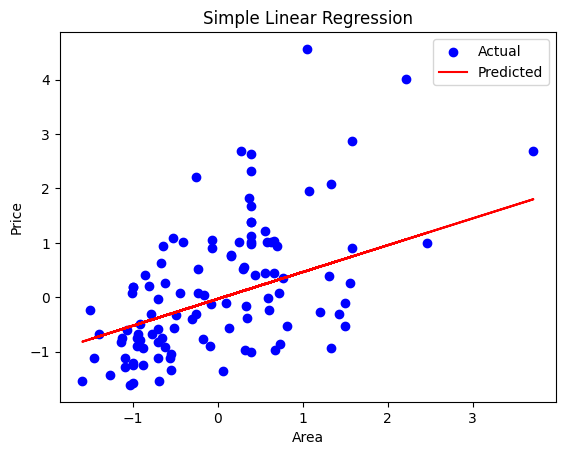

In [77]:
# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Multiple linear regression


In [81]:
# Define features and target
X = df.drop(columns=['price'])
y = df['price']


In [82]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:

# Train
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predict
y_pred = model_multi.predict(X_test)

# Evaluate
print("\nMultiple Linear Regression:")
print("Intercept:", model_multi.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))





Multiple Linear Regression:
Intercept: -1.9330115223879225
MAE: 0.5308237975675775
MSE: 0.5181892599936591
R² Score: 0.6419909931610197


In [87]:
# Feature importance
print("\nFeature Coefficients:")
for name, coef in zip(X.columns, model_multi.coef_):
    print(f"{name}: {coef}")


Feature Coefficients:
area: 0.2744402629967566
bedrooms: 0.04343869645313281
bathrooms: 0.5922428608793313
stories: 0.22155000778413944
mainroad: 0.2068648154351139
guestroom: 0.12858032266172814
basement: 0.2231119352666166
hotwaterheating: 0.37672571715776926
airconditioning: 0.4214402191477873
parking: 0.12693449187521277
prefarea: 0.3388014031150418
furnishingstatus: 0.12590624602602812


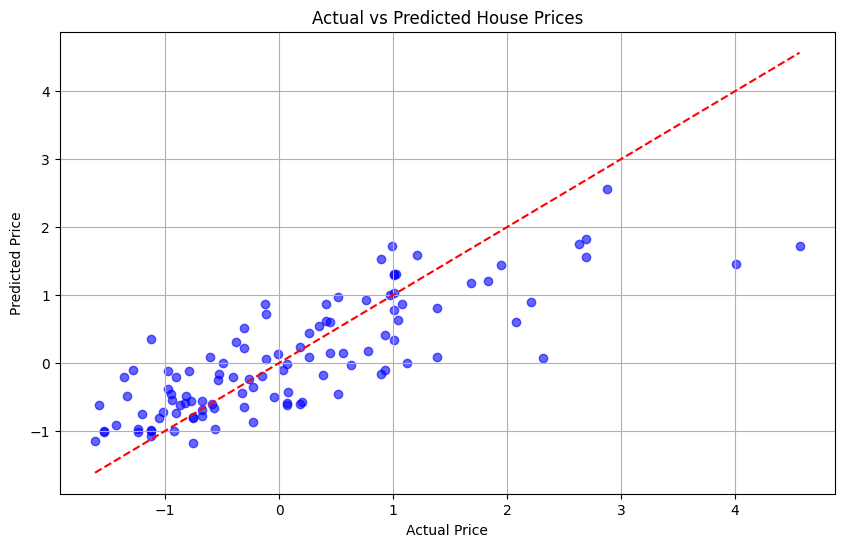

In [88]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()